# CIA County Analysis and Clustering Project

## Goal: Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts

***
### 1. Data

Source: CIA Factbook, Country Comparisons, https://www.cia.gov/the-world-factbook/references/guide-to-country-comparisons/

A data frame has 259 observations on the following 11 variables.

- Country - country name
- Region - region name in country
- Population - total population
- Area - land area, in square miles
- Pop. Density - concentrarion of populationper square mile
- Coastline -  line that forms the boundary between the land and the ocean or a lake
- Net migration - the difference between immigration into and emigration
- Infant mortality (per 1000 births) - amount of children deaths under age of one 
- GDP - gross domestic product divided by midyear population
- Literacy (%) - ability to read and write
- Phones (per 1000) - access to phone per 1000 people
- Arable (%) - land suitable for growing crops
- Crops (%) - percentage of arable land
- Other (%) - other land
- Climate - climate type
- Birthrate - ratio between the number of live-born births in the year and the average total population of that year
- Deathrate - ratio between the number of deaths in the year and the average total population of that year
- Agriculture - pracitce of farmnig
- Industry - econimic activity
- Service - system supplying a public need

Importing necessary library to read data.

In [8]:
import pandas as pd

Reading the data.

In [10]:
df = pd.read_csv('CIA_Country_Facts.csv')

First five values in Dataset.

In [12]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Shape of Dataset.

In [13]:
df.shape

(227, 20)

Random samples from Dataset.

In [16]:
df.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
159,Papua New Guinea,OCEANIA,5670544,462840,12.3,1.11,0.00,51.45,2200.0,64.6,10.9,0.46,1.44,98.10,2.0,29.36,7.25,0.353,0.381,0.266
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.0,30.01,3.92,0.420,0.110,0.470
212,United Arab Emirates,NEAR EAST,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,1.0,18.96,4.40,0.040,0.585,0.375
182,Seychelles,SUB-SAHARAN AFRICA,81541,455,179.2,107.91,-5.69,15.53,7800.0,58.0,262.4,2.22,13.33,84.45,2.0,16.03,6.29,0.032,0.304,0.665
197,Syria,NEAR EAST,18881361,185180,102.0,0.10,0.00,29.53,3300.0,76.9,153.8,25.22,4.43,70.35,1.0,27.76,4.81,0.249,0.230,0.519


Datatypes in DataFrame.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

Basic stats in DataFrame.

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


***
### 2. Exploratory Data Analysis

Import necessary libraries.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Histogram of the Population.

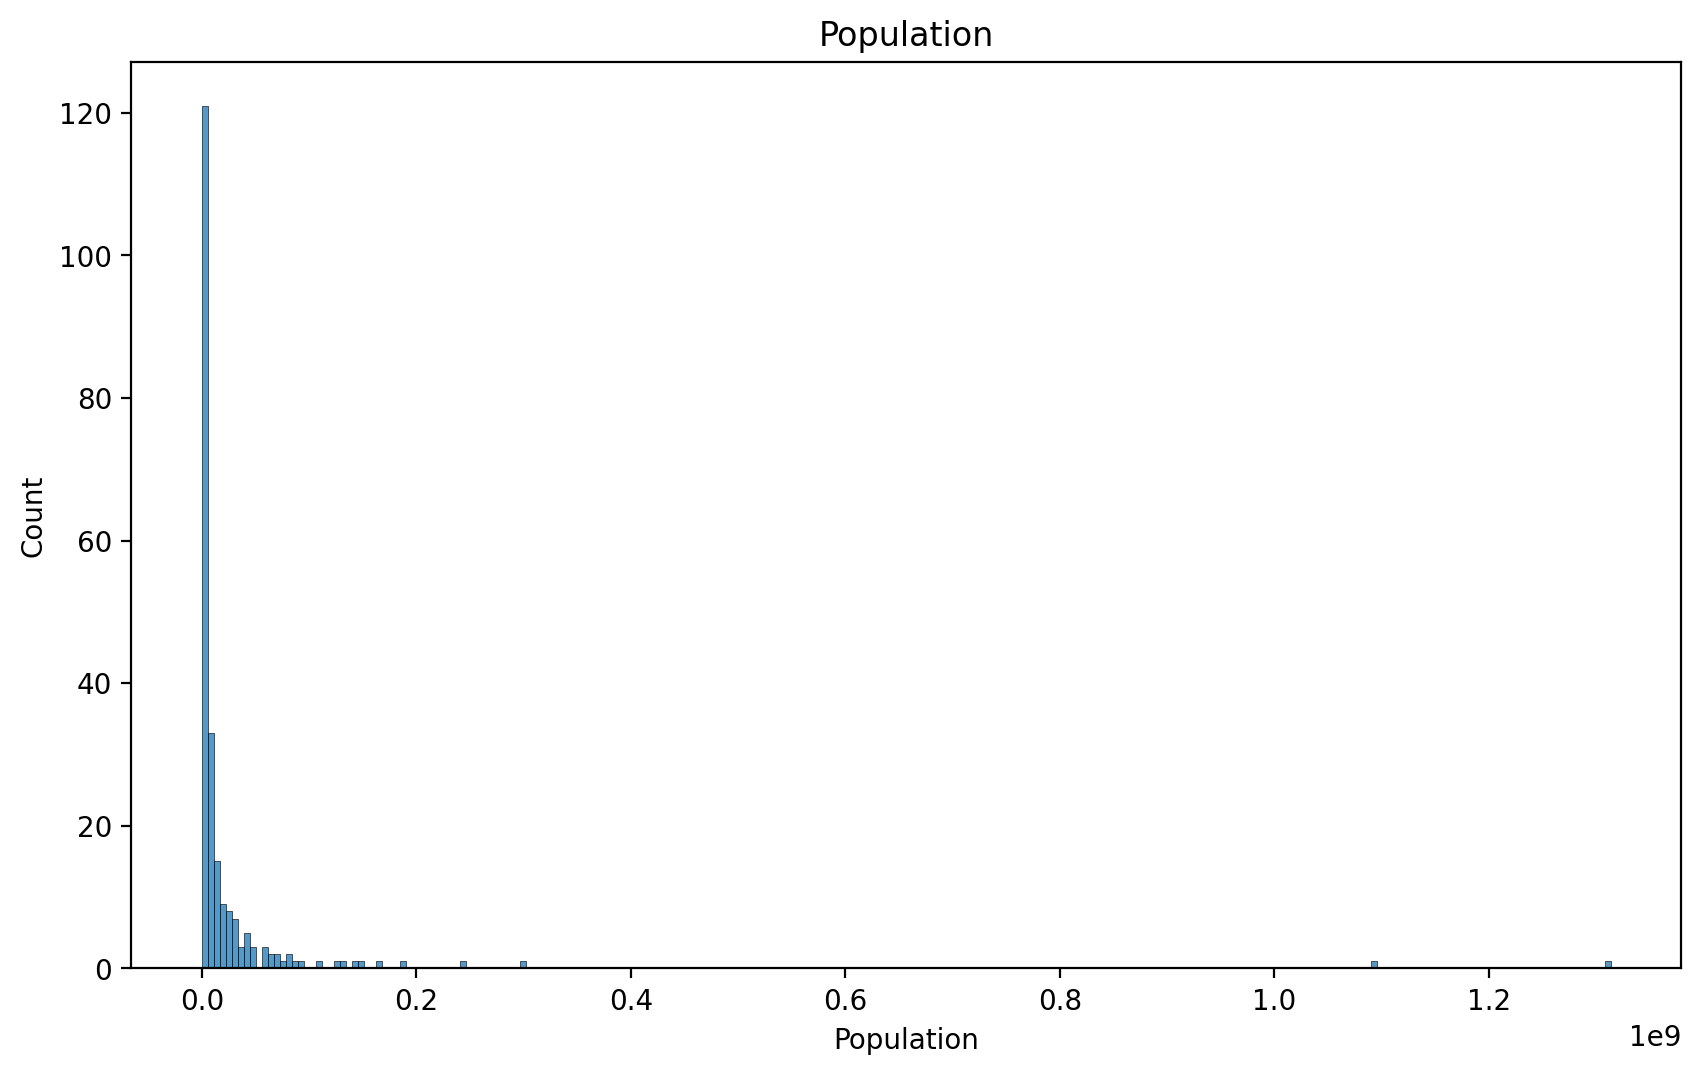

In [29]:
plt.figure(figsize=(10,6), dpi=200)
sns.histplot(data=df, x='Population')
plt.title('Population');

We can notice the histogram is skewed due to few large countries, let's reset X axis to only show countries with less than 0.5 bilion people.

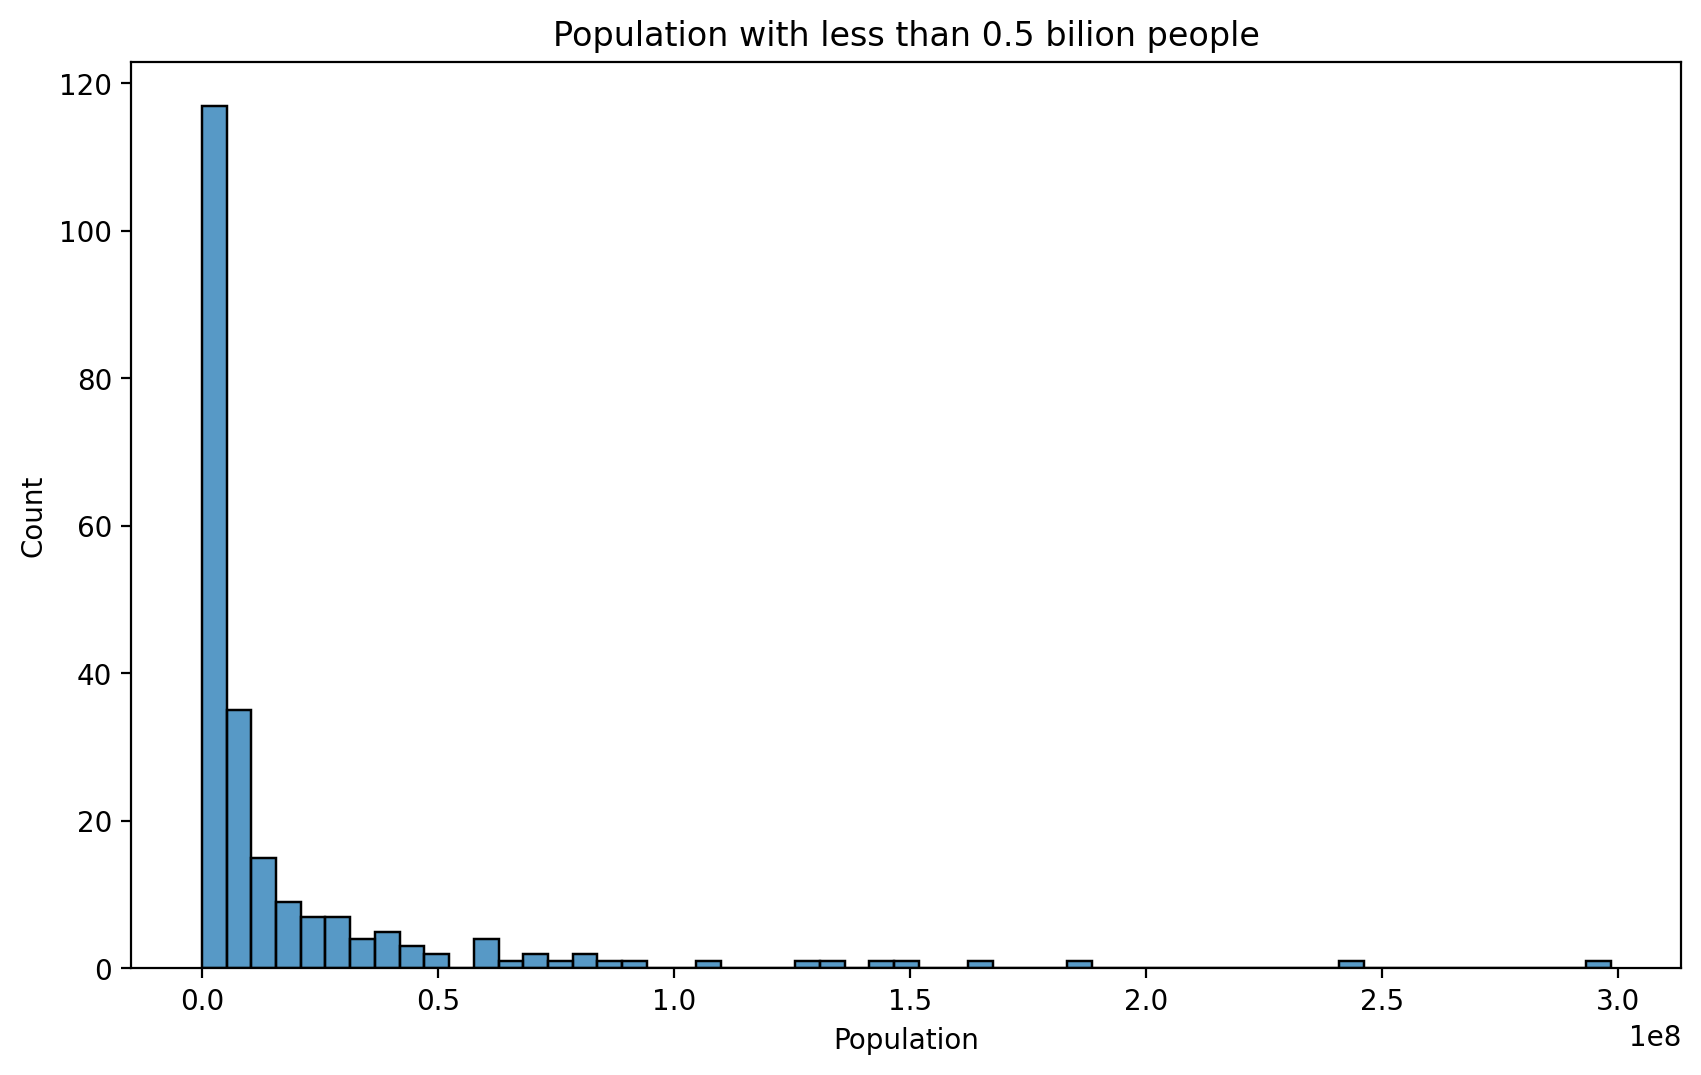

In [33]:
plt.figure(figsize=(10,6), dpi=200)
sns.histplot(data=df[df['Population']<500000000],x='Population')
plt.title('Population with less than 0.5 bilion people');

Barplot showing the mean GDP per capita per Region.

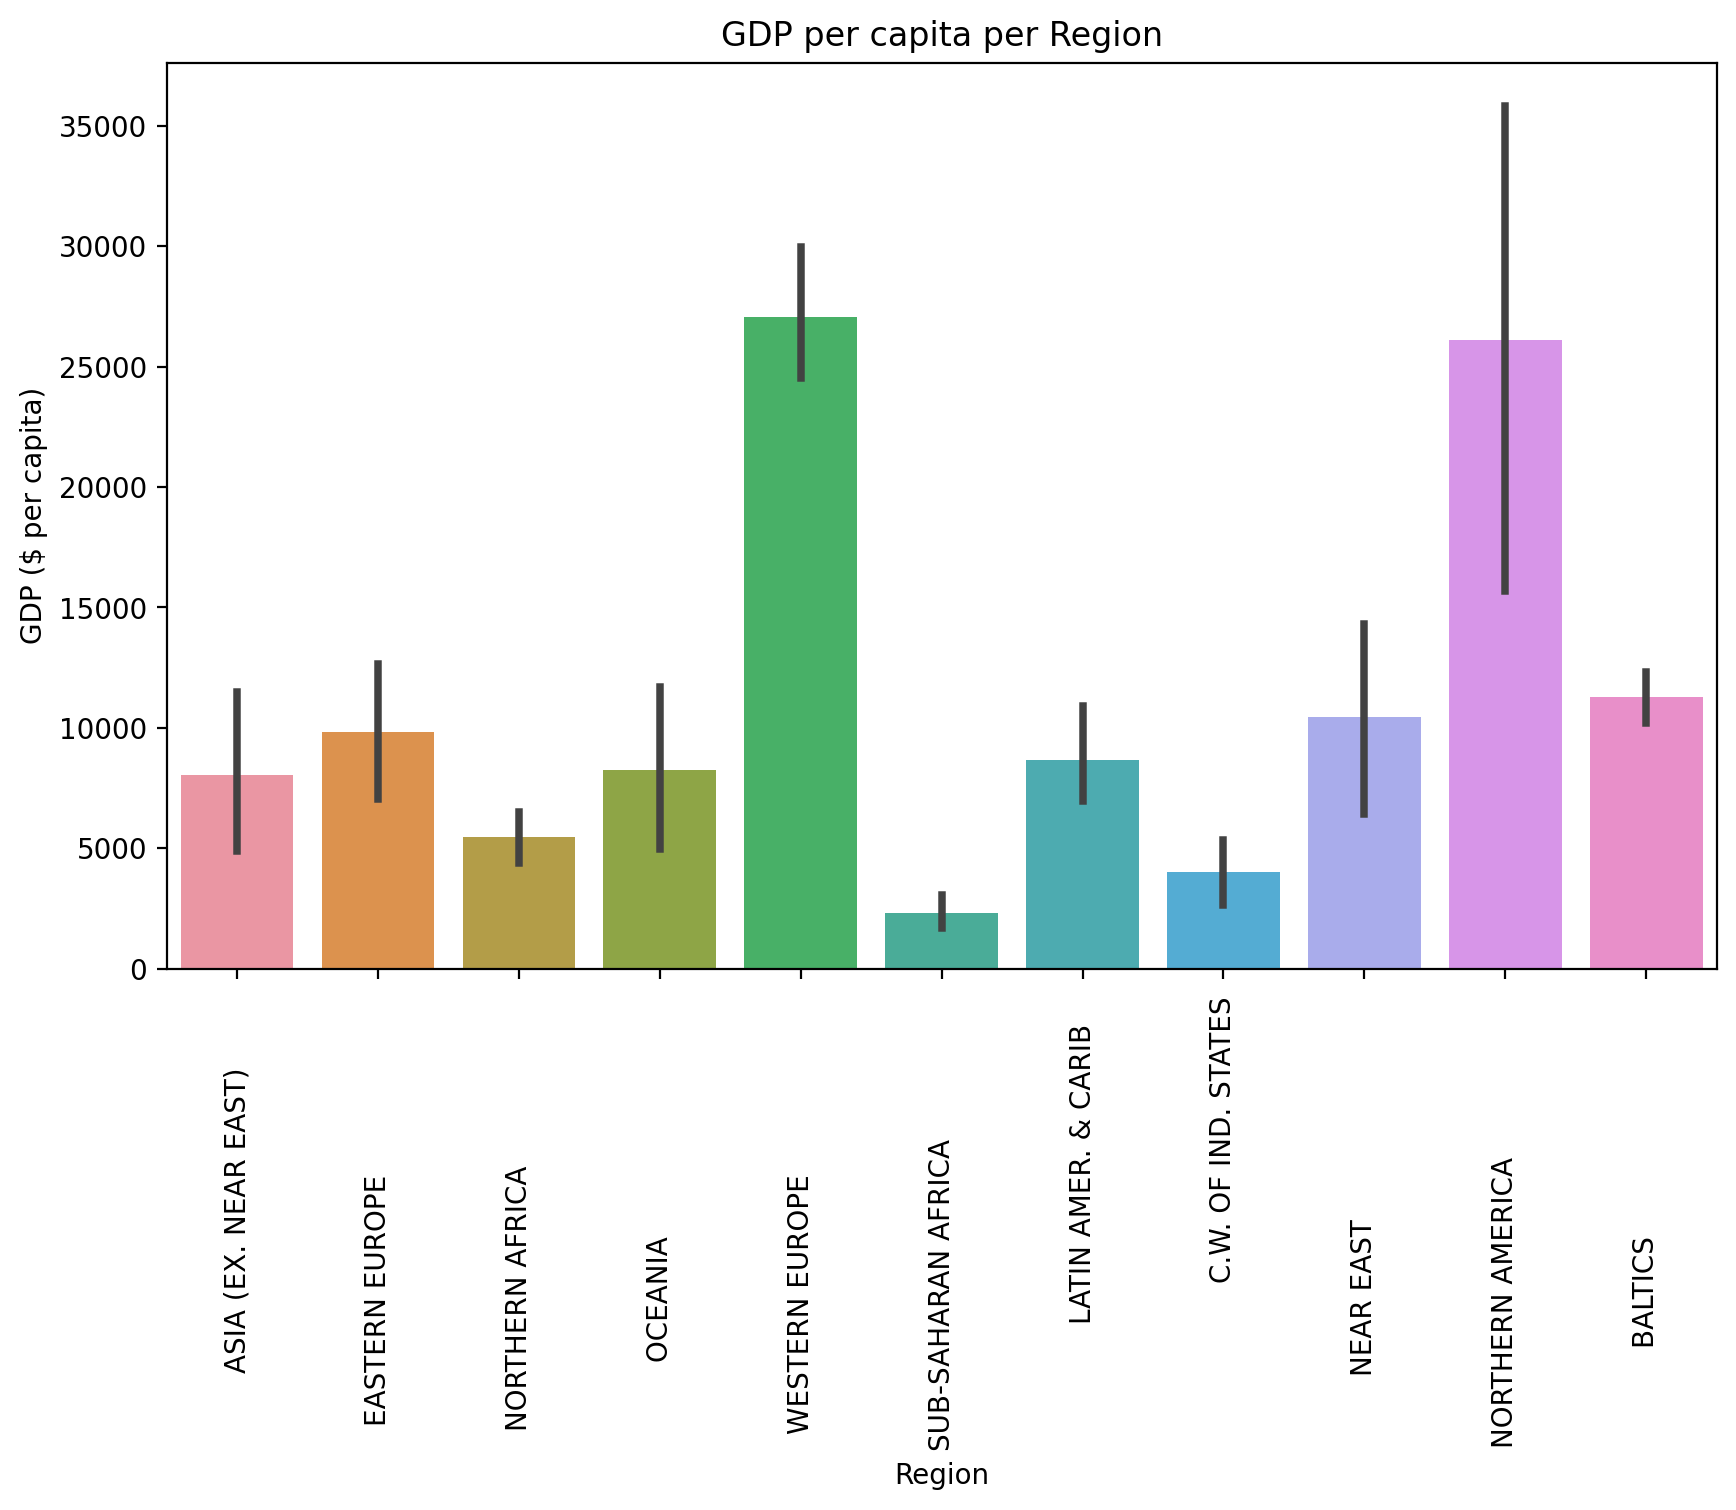

In [35]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.title('GDP per capita per Region')
plt.xticks(rotation=90);

North America and Western Europe have the highest GDP per capita per Region and Sub-Saharan Africa has the lowest.

Scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita, colored by Region.

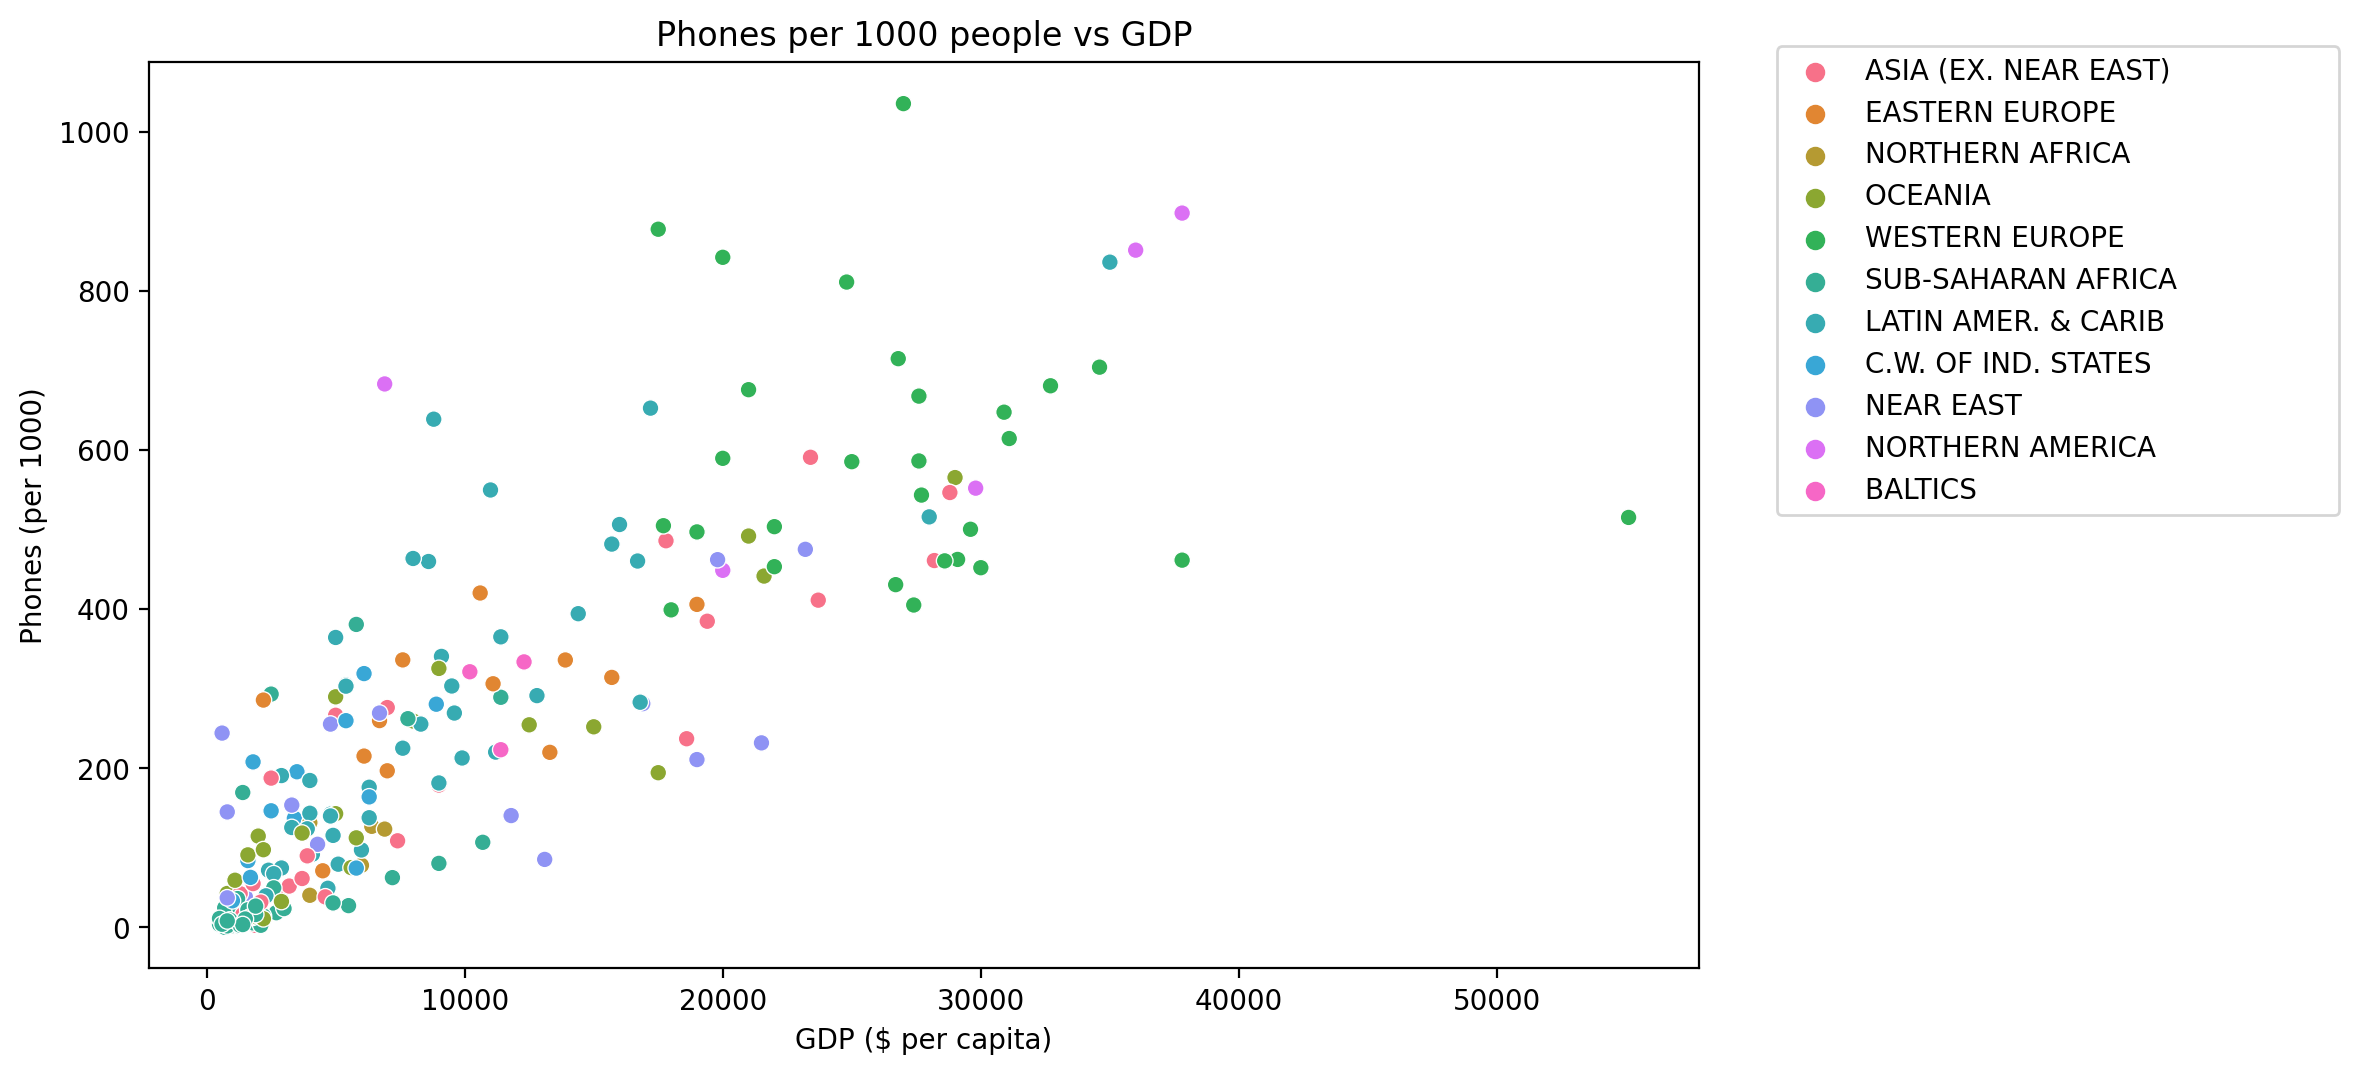

In [41]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.title('Phones per 1000 people vs GDP')
plt.legend(loc=(1.05,0.5));

We can see some correlation between GDP and having a phone which makes sense, what is more we have to outliers one with high amount of phones and middling GDP and the second one with reverse parameters.

In [50]:
df[df['GDP ($ per capita)'] > 45000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


Luxemburg has the highest GDP per capita and people there don't have that many phones.

In [52]:
df[df['Phones (per 1000)'] > 1000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


Monaco is the country with highest amount of phone owners and pretty average GDP per capita.

 Scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region).

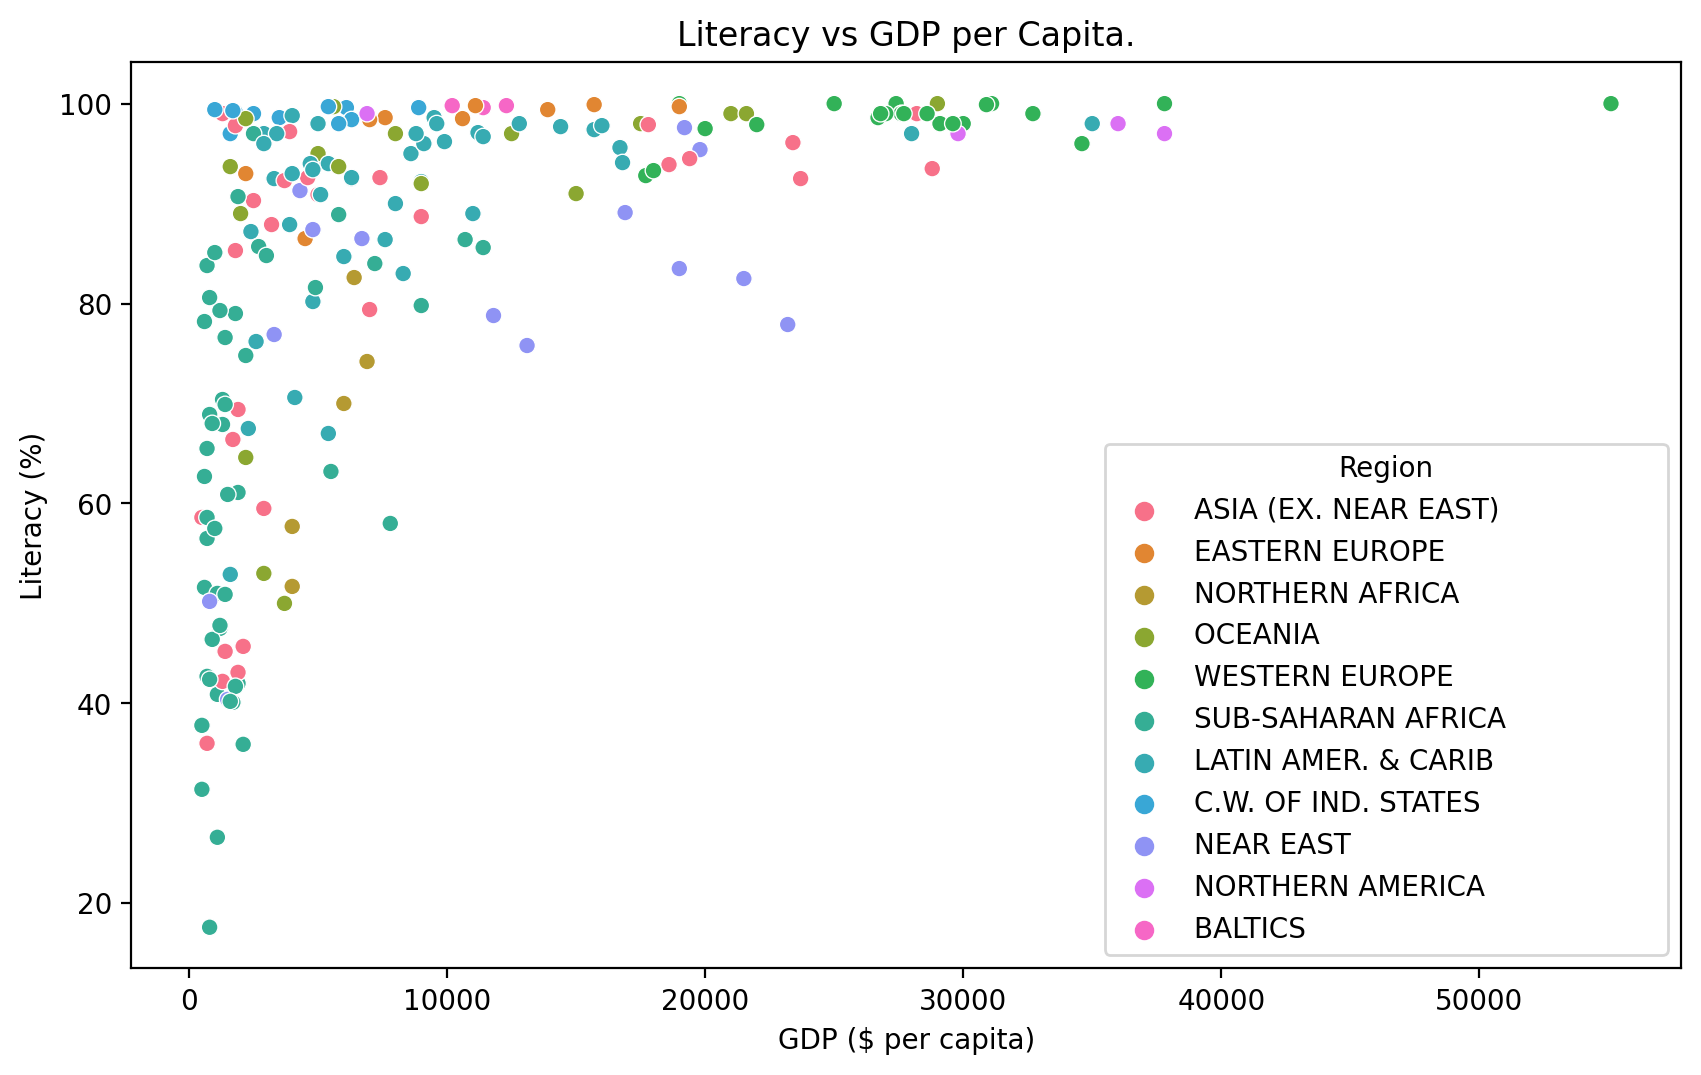

In [47]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region');
plt.title('Literacy vs GDP per Capita.');

We can see that if you exceed the level of around 15000 GDP then you will have high percentage of Literacy.

Heatmap of Correlation between columns in the DataFrame.

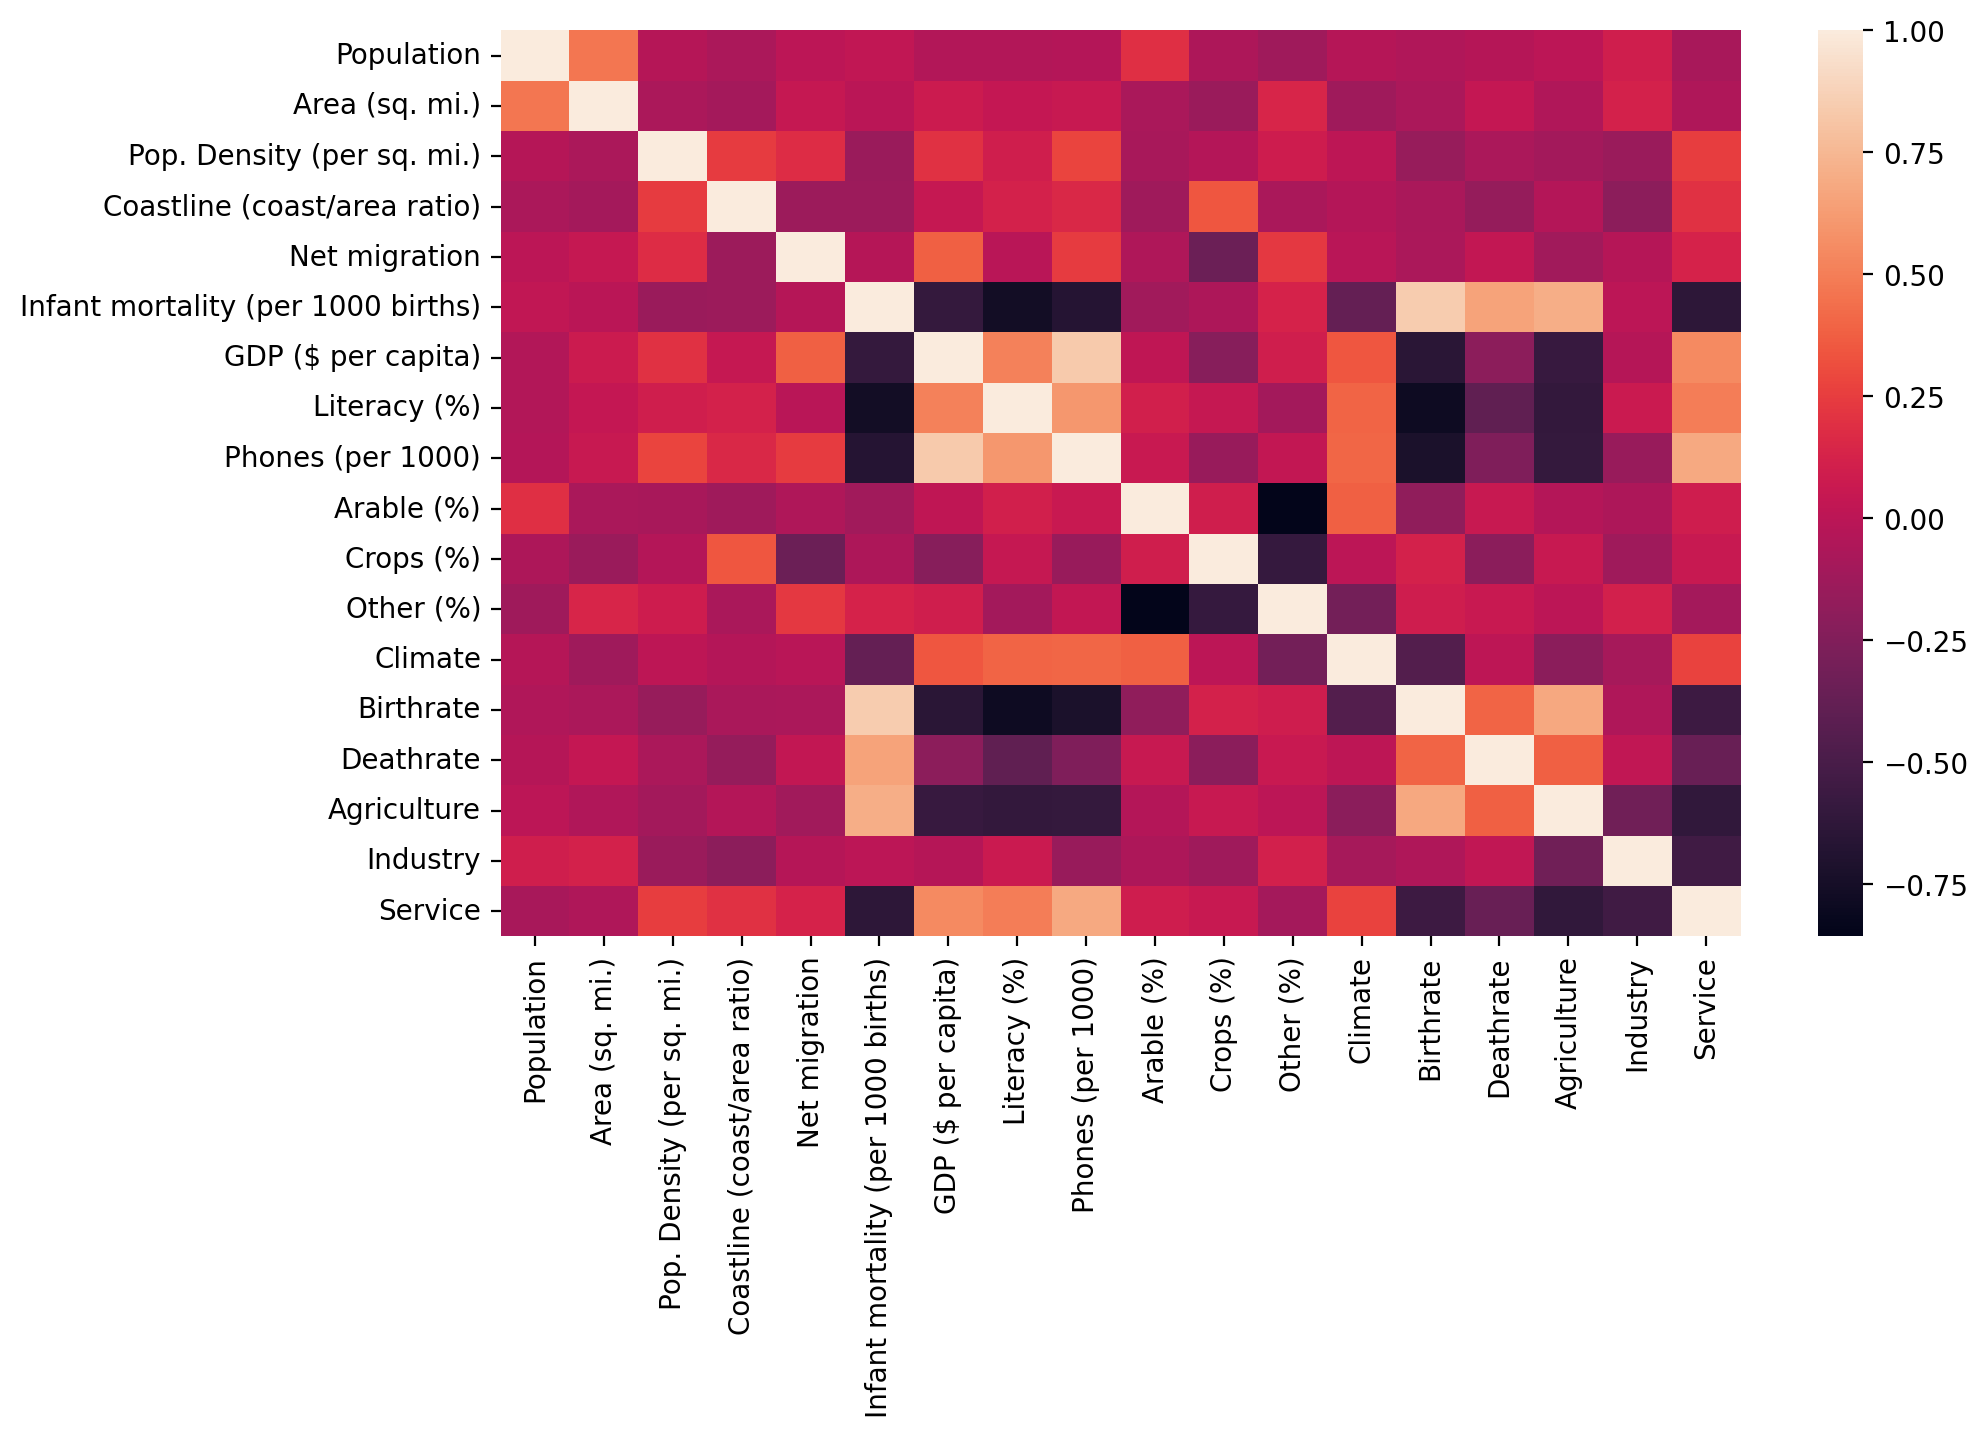

In [58]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(df.corr());

Let's create clustermap of correlation to better have a better sight in it.

<Figure size 2000x1600 with 0 Axes>

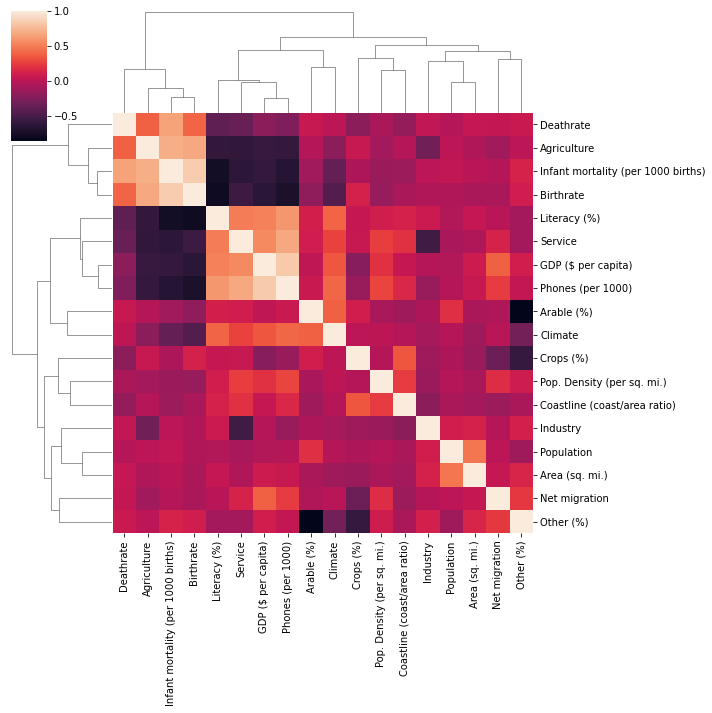

In [62]:
plt.figure(figsize=(10,8),dpi=200)
sns.clustermap(df.corr());

***
### 3. Data Prepataion and Model Discovery

Reporting the number of missing elements per column.

In [65]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Countries which have NAN for Agriculture.

In [67]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

Most of these countries are tiny islands, with the exception of Greenland and Western Sahara. We can fill NAN values with 0 because they are so small or essentailly non-existant.

In [68]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

NAN values update.

In [70]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

Climate is missing for a few countries, but not for a Region, we can fill missing climate values based on the mean climate for its Region.

In [71]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

NAN values update.

In [72]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

Let's check Literacy NAN values.

In [73]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563
185,Slovakia,EASTERN EUROPE,5439448,48845,111.4,0.00,0.30,7.41,13300.0,NaN,220.1,30.16,2.62,67.22,3.000000,10.65,9.45,0.035,0.294,0.672
187,Solomon Islands,OCEANIA,552438,28450,19.4,18.67,0.00,21.29,1700.0,NaN,13.4,0.64,2.00,97.36,2.000000,30.01,3.92,0.420,0.110,0.470


We will fill it with mean literacy of the Region.

In [75]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

NAN values update.

In [76]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

We are now missing values for only few countries, for simplicity we will drop it.

In [77]:
df = df.dropna()

 It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point

In [78]:
X = df.drop("Country",axis=1)

Creating dummy variables for categorical strings.

In [79]:
X = pd.get_dummies(X)

In [80]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first.

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [83]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

***
### 4. Creating and fitting K-Means Model

In [85]:
from sklearn.cluster import KMeans

In [86]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

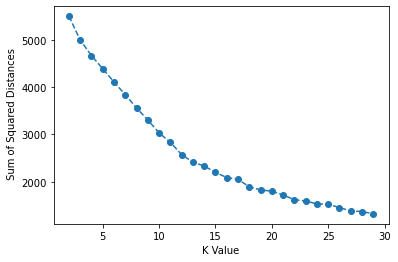

In [89]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

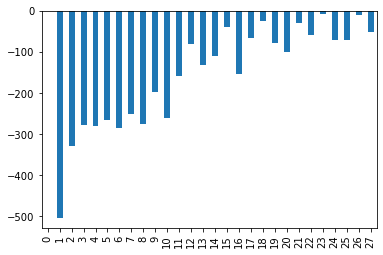

In [90]:
pd.Series(ssd).diff().plot(kind='bar');

***
### 5. Model Interpretation

Significant drop off can be seen in SSD difference at K=3, but there are no 100% answer here.

In [91]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [92]:
model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2])

In [93]:
X['K=3 Clusters'] = model.labels_

Correlation between clustering and values.

In [94]:
X.corr()['K=3 Clusters'].sort_values()

Region_LATIN AMER. & CARIB                   -0.383277
Literacy (%)                                 -0.359238
Crops (%)                                    -0.239658
Region_OCEANIA                               -0.234762
Region_NEAR EAST                             -0.211959
Region_C.W. OF IND. STATES                   -0.183274
Coastline (coast/area ratio)                 -0.145326
Region_NORTHERN AFRICA                       -0.145002
Phones (per 1000)                            -0.137725
Service                                      -0.096146
Population                                   -0.086608
Region_ASIA (EX. NEAR EAST)                  -0.084417
Industry                                     -0.041552
Area (sq. mi.)                               -0.034405
Region_NORTHERN AMERICA                      -0.019085
GDP ($ per capita)                           -0.008039
Pop. Density (per sq. mi.)                    0.016705
Arable (%)                                    0.037717
Region_BAL